In [1]:
#notebook to compare our autoencoder clustering to our kmeans clustering

from __future__ import absolute_import, division, print_function, unicode_literals

#import tensorflow as tf

import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

plt.style.use('demo_style.mplstyle')

In [2]:
#get job info

import os

os.environ["SLURM_JOB_ID"]


'676267'

In [3]:
#load our kmeans labels

q003_labels = np.load('/global/cscratch1/sd/stephey/march2020_data/magnet-notebooks/scripts/q003_kmeans_labels_nocurrent.npy')
q103_labels = np.load('/global/cscratch1/sd/stephey/march2020_data/magnet-notebooks/scripts/q103_kmeans_labels_nocurrent.npy')

In [4]:
#load our old data

q003_data = np.load('/global/cscratch1/sd/stephey/march2020_data/Output/q003_data.npy')
q103_data = np.load('/global/cscratch1/sd/stephey/march2020_data/Output2/q103_data.npy') 

qall_data = np.concatenate((q003_data, q103_data), axis=0)



In [15]:
#load old encoded data

encoded_old = np.load('encoded_all.npy', compile=False) #just use, don't train

In [43]:
#load new data and put into encoder

pq_data = np.load('/global/cscratch1/sd/stephey/march2020_data/Q3_Q103_postquench/pq_rawdata.npy')

pq_labels = 2*np.ones(pq_data.shape[0], dtype=np.int)
print(pq_labels)
print(q003_labels)
from tensorflow import keras
encoder = keras.models.load_model('encoder_model_n2.h5')

pq_reshape = pq_data.reshape((len(pq_data), np.prod(pq_data.shape[1:])))
encoded_pq = encoder.predict(pq_reshape)



[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[0 0 0 ... 0 1 0]
[[10.20437    0.        45.47977   ... 33.559643  14.4810505  0.       ]
 [ 0.         0.        13.893024  ... 15.628931  18.344893   0.       ]
 [ 0.         0.         9.252261  ... 13.33591   11.300476   0.       ]
 ...
 [ 0.         0.         8.888189  ...  9.3672495 15.145791   0.       ]
 [ 0.         0.        18.137548  ...  6.6087813 15.992158   0.       ]
 [ 3.2104428  0.        32.988304  ... 18.892351  20.333166   0.       ]]


In [38]:
#append new data

encoded_all = np.concatenate((encoded_old, encoded_pq), axis=0)

In [56]:
#now put all encoded data into pca

#Try pca on encoded images why not
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
#need to flatten i guess?
img_pca = pca.fit_transform(encoded_all)

print(img_pca.shape)

(9807, 2)


In [57]:
qall_labels = np.concatenate((q003_labels, q103_labels, pq_labels), axis=0)

print(qall_labels.shape)

#boundary 1
boundary1 = q003_data.shape[0]

color_key=['purple','green','red']
color_label=[]
for label in qall_labels:
    if label == 0:
        color_label.append(color_key[0])
    elif label == 1:
        color_label.append(color_key[1])
    elif label == 2:
        color_label.append(color_key[2])
    else:
        print("label incorrect")
        
#print(color_label)       

(9807,)


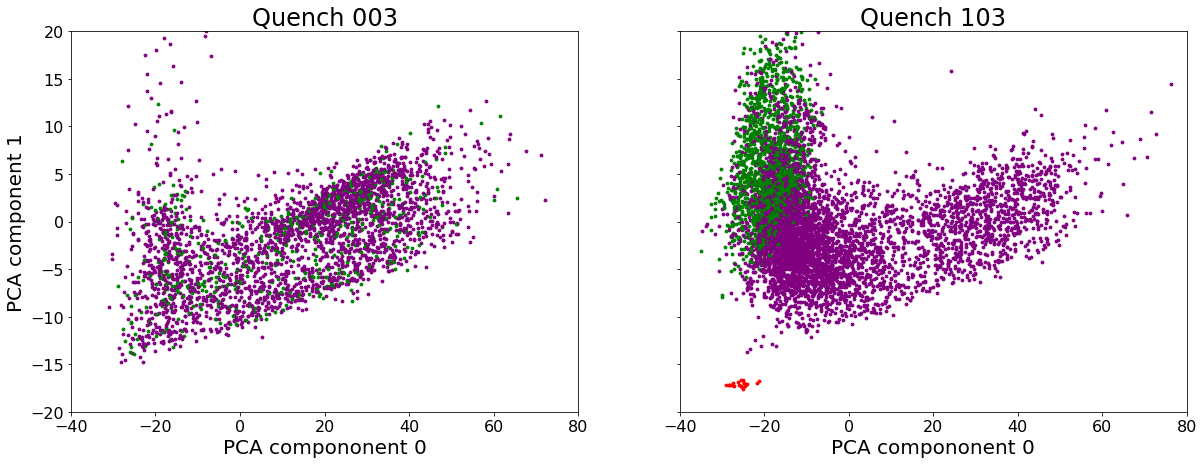

In [69]:

msize = 8
xlimits = (-40,80)
ylimits = (-20,20)

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(20,7)
for i in range(len(qall_labels)):
    if i <= q003_data.shape[0]:
        axs[0].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[0].set_title('Quench 003')
        axs[0].set_xlim(xlimits)
        axs[0].set_ylim(ylimits)  
    else:
        axs[1].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[1].set_title('Quench 103')
        axs[1].set_xlim(xlimits)
        axs[1].set_ylim(ylimits)      

for ax in axs.flat:
    ax.set(xlabel='PCA compononent 0', ylabel='PCA component 1')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

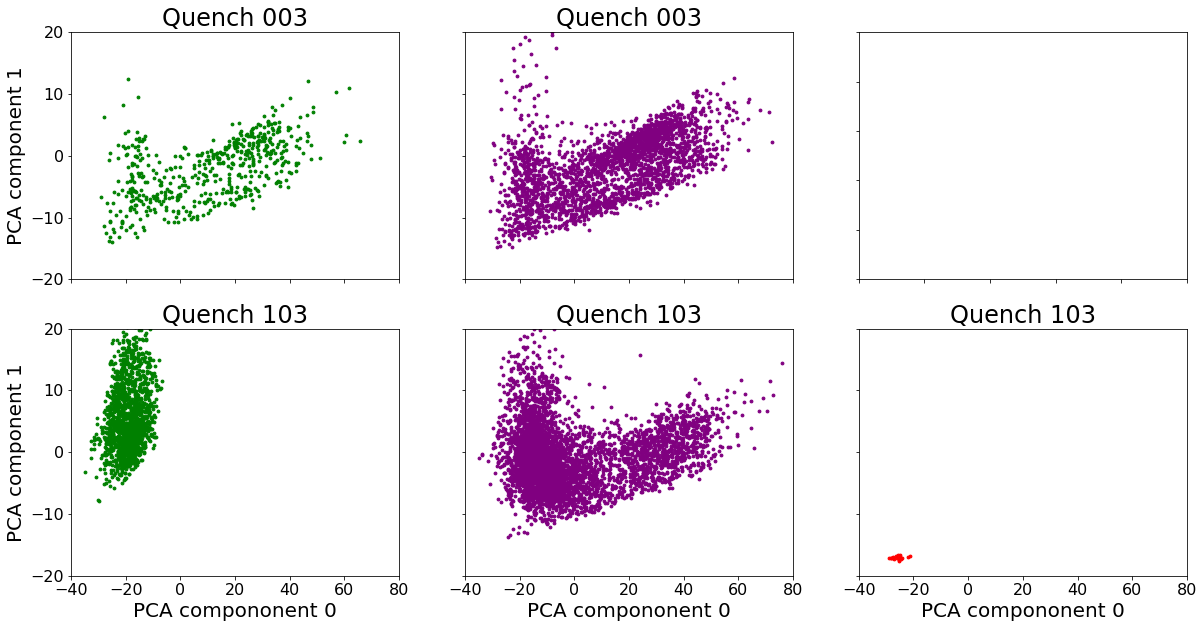

In [68]:
#make additoinal figure plotting green and purple separately

#make the same plot but show all quenches separately

msize = 8


fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
for i in range(len(qall_labels)):
    if (i <= q003_data.shape[0]) and (color_label[i]=='green'):
        axs[0, 0].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[0, 0].set_title('Quench 003')
        axs[0, 0].set_xlim(xlimits)
        axs[0, 0].set_ylim(ylimits)
    elif (i <= q003_data.shape[0]) and (color_label[i]=='purple'):
        axs[0, 1].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[0, 1].set_title('Quench 003')
        axs[0, 1].set_xlim(xlimits)
        axs[0, 1].set_ylim(ylimits)
    elif (i <= q003_data.shape[0]) and (color_label[i]=='red'):
        axs[0, 2].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[0, 2].set_title('Quench 003')
        axs[0, 2].set_xlim(xlimits)
        axs[0, 2].set_ylim(ylimits)       
    elif (i > q003_data.shape[0]) and (color_label[i]=='green'):
        axs[1, 0].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[1, 0].set_title('Quench 103')
        axs[1, 0].set_xlim(xlimits)
        axs[1, 0].set_ylim(ylimits)        
    elif (i > q003_data.shape[0]) and (color_label[i]=='purple'):
        axs[1, 1].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[1, 1].set_title('Quench 103')
        axs[1, 1].set_xlim(xlimits)
        axs[1, 1].set_ylim(ylimits)
    elif (i > q003_data.shape[0]) and (color_label[i]=='red'):
        axs[1, 2].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[1, 2].set_title('Quench 103')
        axs[1, 2].set_xlim(xlimits)
        axs[1, 2].set_ylim(ylimits)         

for ax in axs.flat:
    ax.set(xlabel='PCA compononent 0', ylabel='PCA component 1')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()